# Image Interpolation

Contents:
- Nearest-neighbour Interpolation
- Bilinear Interpolation

Author: Abijith J. Kamath, IISc. https://kamath-abhijith.github.io

In [1]:
import numpy as np

from skimage import io
from matplotlib import pyplot as plt
from matplotlib import rcParams
from matplotlib import style

## Nearest-Neighbour Interpolation

Let $I$ be an $M\times N$ image. Nearest-neighbour interpolation allows resizing of $I$ where the new pixels are set to zero-order hold in case of upsampling or deleted in case of downsampling.

## Bilinear Interpolation

Let $I$ be an $M\times N$ image. Bilinear interpolation allows resizing of $I$ where the new pixels are generated using a bilinear function of the pixel location.

In [2]:
## FUNCTION DEFINITON: NEAREST-NEIGHBOUR INTERPOLATION

def resize(image, new_size, mode='nearest'):

    m, n = image.shape
    m_new, n_new = np.array(new_size).astype(int)

    if mode == 'nearest':
        m_scale = m_new/(m-1)
        n_scale = n_new/(n-1)

        resized_image = np.zeros([m_new, n_new])
        for i in range(m_new-1):
            for j in range (n_new-1):
                resized_image[i+1,j+1] = image[1+int(i/m_scale),1+int(j/n_scale)]

    elif mode == 'bilinear':
        image = image.ravel()

        x_ratio = float(n - 1) / (n_new - 1) if n_new > 1 else 0
        y_ratio = float(m - 1) / (m_new - 1) if m_new > 1 else 0

        y, x = np.divmod(np.arange(m_new * n_new), n_new)

        x_l = np.floor(x_ratio * x).astype('int32')
        y_l = np.floor(y_ratio * y).astype('int32')

        x_h = np.ceil(x_ratio * x).astype('int32')
        y_h = np.ceil(y_ratio * y).astype('int32')

        x_weight = (x_ratio * x) - x_l
        y_weight = (y_ratio * y) - y_l

        a = image[y_l * n + x_l]
        b = image[y_l * n + x_h]
        c = image[y_h * n + x_l]
        d = image[y_h * n + x_h]

        resized_image = a * (1 - x_weight) * (1 - y_weight) + \
                    b * x_weight * (1 - y_weight) + \
                    c * y_weight * (1 - x_weight) + \
                    d * x_weight * y_weight

        resized_image = resized_image.reshape(m_new, n_new)

    return resized_image

## Image Rotation

Let $I$ be an $M\times N$ image. The image rotated by $\theta$ is computed using:
$$
I_{\theta}(i,j) = I\big(i\cos(\theta)-j\sin(\theta), i\sin(\theta)+j\cos(\theta)\big)
$$

In [3]:
## FUNCTION DEFINITION: IMAGE ROTATION

def ImgRotate(image, angle, mode='nearest'):
    
    m,n = image.shape
    rotated_image = np.zeros([2*m, 2*n])

    init_origin_m = round((m+1)/2-1)
    init_origin_n = round((n+1)/2-1)

    rotated_origin_m = round((2*m+1)/2-1)
    rotated_origin_n = round((2*n+1)/2-1)

    for i in range(m):
        for j in range(n):
            y = m - 1 - i - init_origin_m
            x = n - 1 - j - init_origin_n

            rotated_y = round(-x*np.sin(angle) + y*np.cos(angle))
            rotated_x = round(x*np.cos(angle) + y*np.sin(angle))

            rotated_image[round(((2*m+1)/2)-1)-rotated_y, round(((2*n+1)/2)-1)-rotated_x] = image[i,j]

    rotated_image = resize(rotated_image, (2*m, 2*n), mode)

    return rotated_image

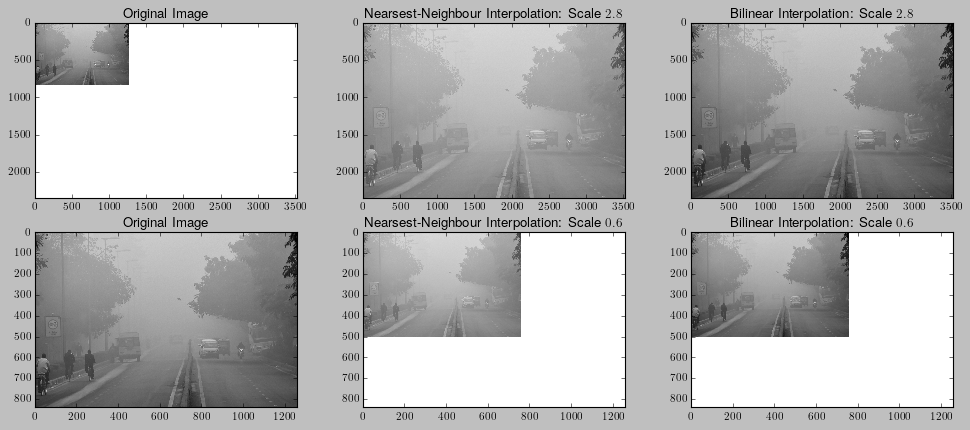

In [6]:
## READ AND DISPLAY IMAGES

image = io.imread('Hazy.png', 0)
m0, n0 = image.shape

## IMAGE RESIZING USING NEAREST-NEIGHBOUR AND BILINEAR INTERPOLATION
mag_factor = 2.8
mag_image_nn = resize(image, (mag_factor*m0, mag_factor*n0), mode='nearest')
mag_image_bl = resize(image, (mag_factor*m0, mag_factor*n0), mode='bilinear')

min_factor = 0.6
min_image_nn = resize(image, (min_factor*m0, min_factor*n0), mode='nearest')
min_image_bl = resize(image, (min_factor*m0, min_factor*n0), mode='bilinear')


## PLOTS
style.use('classic')

rcParams['text.usetex'] = True
rcParams.update({'font.size': 10})
rcParams['text.latex.preamble'] = [r'\usepackage{tgheros}'] 

fig, plts = plt.subplots(2,3, figsize=(15,6))
plts[0,0].imshow(image, cmap='gray')
plts[0,0].set_ylim([mag_factor*m0,0])
plts[0,0].set_xlim([0,mag_factor*n0])
plts[0,0].set_title(r"Original Image")

plts[0,1].imshow(mag_image_nn, cmap='gray')
plts[0,1].set_ylim([mag_factor*m0,0])
plts[0,1].set_xlim([0,mag_factor*n0])
plts[0,1].set_title(r"Nearsest-Neighbour Interpolation: Scale $%.1f$"%(mag_factor))

plts[0,2].imshow(mag_image_bl, cmap='gray')
plts[0,2].set_ylim([mag_factor*m0,0])
plts[0,2].set_xlim([0,mag_factor*n0])
plts[0,2].set_title(r"Bilinear Interpolation: Scale $%.1f$"%(mag_factor))

plts[1,0].imshow(image, cmap='gray')
plts[1,0].set_ylim([m0,0])
plts[1,0].set_xlim([0,n0])
plts[1,0].set_title(r"Original Image")

plts[1,1].imshow(min_image_nn, cmap='gray')
plts[1,1].set_ylim([m0,0])
plts[1,1].set_xlim([0,n0])
plts[1,1].set_title(r"Nearsest-Neighbour Interpolation: Scale $%.1f$"%(min_factor))

plts[1,2].imshow(min_image_bl, cmap='gray')
plts[1,2].set_ylim([m0,0])
plts[1,2].set_xlim([0,n0])
plts[1,2].set_title(r"Bilinear Interpolation: Scale $%.1f$"%(min_factor))

plt.savefig('/Users/abhijith/Desktop/TECHNOLOGIE/Courses/E9 241 Digital Signal Processing/Assignments/Assignment_2/Answers/figures/interp.eps', format='eps')
plt.show()

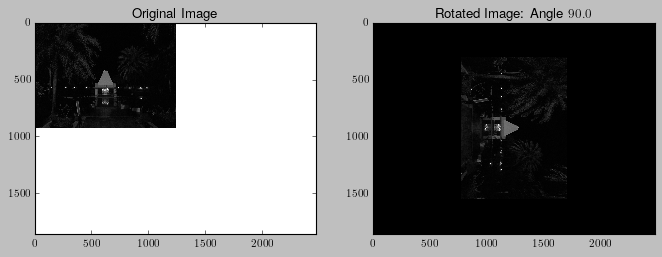

In [9]:
## IMAGE ROTATION

image = io.imread('LowLight_2.png', 0)
m0, n0 = image.shape
set_angle = -np.pi/2
rotated_image = ImgRotate(image, set_angle, mode='bilinear')

fig, plts = plt.subplots(1,2, figsize=(10,6))
plts[0].imshow(image, cmap='gray')
plts[0].set_ylim([2*m0, 0])
plts[0].set_xlim([0,2*n0])
plts[0].set_title(r"Original Image")

plts[1].imshow(rotated_image, cmap='gray')
plts[1].set_ylim([2*m0, 0])
plts[1].set_xlim([0,2*n0])
plts[1].set_title(r"Rotated Image: Angle $%.1f$"%(-set_angle*180/np.pi))

plt.savefig('/Users/abhijith/Desktop/TECHNOLOGIE/Courses/E9 241 Digital Signal Processing/Assignments/Assignment_2/Answers/figures/rotate.eps', format='eps', dpi=300)
plt.show()